In [202]:
import pandas as pd
import seaborn as sns

In [203]:
tips = sns.load_dataset("tips")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


1. 컬럼의 이름 변경 -> [총 금액, 팁, 성별, 흡연 여부, 요일, 시간, 인원]
2. 총 금액, 팁 컬럼의 데이터를 소수점 첫째 자리까지 유지하고 반올림
3. 식사 인원, 성별에 따라(그룹화) 팁의 비율의 평균값을 구하고 시각화(바형그래프)

In [204]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [205]:
tips.columns = ["총 금액", "팁", "성별", "흡연 여부", "요일", "시간", "인원"]
tips.head(1)

,총 금액,팁,성별,흡연 여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2


In [206]:
tips[["총 금액", "팁"]] = tips[["총 금액", "팁"]].round(1)
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3


In [207]:
# 팁 비율 = (팁 / 총 금액) * 100
tips["팁 비율"] = tips["팁"] / tips["총 금액"] * 100
tips.head(2)

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854


In [208]:
group_data = tips.groupby(["인원", "성별"]).mean()["팁 비율"]

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_17392\3966941344.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(["인원", "성별"]).mean()["팁 비율"]


<AxesSubplot: ylabel='인원,성별'>

C:\Users\Kim Taemin\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim Taemin\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim Taemin\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim Taemin\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Kim Taemin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

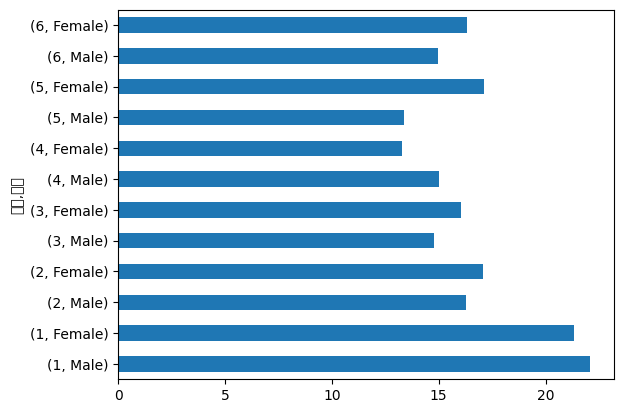

In [209]:
group_data.plot.barh()

In [210]:
import matplotlib.pyplot as plt

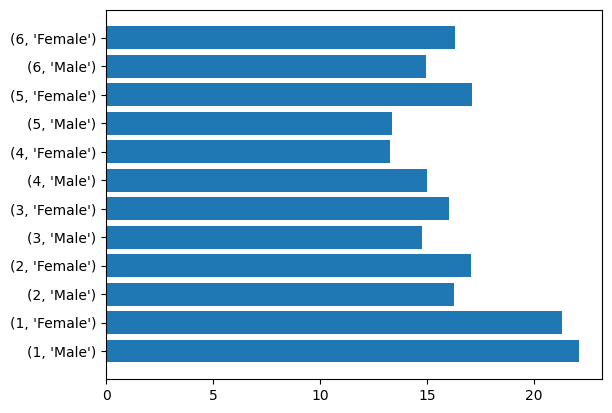

In [211]:
x = group_data.index
list_x = list(range(0, len(x), 1))
y = group_data.values

plt.barh(list_x, y)
plt.yticks(list_x, x)
plt.show()

In [ ]:
group_data = tips.groupby(["인원", "성별"]).mean()[["팁 비율"]]
group_data

1. 남자의 팁 비율 데이터프레임 생성
2. 여자의 팁 비율 데이터프레임 생성
3. 2개의 데이터프레임을 시각화

In [ ]:
sample = tips.set_index(["총 금액", "성별"])
sample.loc[(10.3, "Male"), :]

In [ ]:
# 남자의 팁 비율 데이터프레임 생성
group_data.index

# 멀티 인덱스에 성별 부분만 출력
for i in group_data.index :
    print(i[1])

male_data1 = pd.DataFrame()
female_data1 = pd.DataFrame()
male_data2 = pd.DataFrame()
female_data2 = pd.DataFrame()

# step2 : for문을 이용하여 male인 경우 1을 출력, female인 경우 2를 출력
for i in group_data.index :
    if i[1] == "Male" :
        print(1)
    else :
        print(2)

In [ ]:
test_df = pd.DataFrame()

for i in tips.index :
    if i % 10 == 0 :
        test_df = pd.concat([test_df, tips.loc[[i]]])

test_df

In [216]:
test2_df = pd.DataFrame()

for i in tips.index :
    if i % 50 == 0 :
        test2_df = pd.concat([test2_df, tips.loc[[i]]])

test2_df

,총 금액,팁,성별,흡연 여부,요일,시간,인원,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
50,12.5,2.5,Male,No,Sun,Dinner,2,20.000000
100,11.4,2.5,Female,Yes,Fri,Dinner,2,21.929825
150,14.1,2.5,Male,No,Sun,Dinner,2,17.730496
200,18.7,4.0,Male,Yes,Thur,Lunch,3,21.390374


In [217]:
# step3 : for문에서 male인 경우 해당하는 인덱스의 데이터를 출력
# loc[인덱스 비교, 컬럼 비교]
# iloc[인덱스의 위치 비교, 컬럼의 위치 비교]

In [218]:
# step4 : for문에서 male, female인 경우 비어있는 데이터프레임에서 행 추가
for i in group_data.index :
    if i[1] == "Male" :
        male_data1 = pd.concat([male_data1, group_data.loc[[i]]])
    else :
        female_data1 = pd.concat([female_data1, group_data.loc[[i]]])


In [ ]:
male_data1

In [ ]:
female_data1

In [221]:
# step4 : for문에서 male, female인 경우 비어있는 데이터프레임에서 행 추가
for i in group_data.index :
    if i[1] == "Male" :
        male_data2 = group_data.query("성별 == 'Male'")
    else :
        female_data2 = group_data.query("성별 == 'Female'")

In [ ]:
male_data2

In [ ]:
female_data2

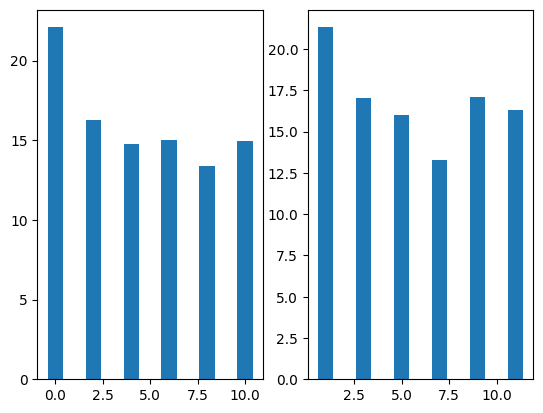

In [228]:
x1 = range(0, len(male_data1.index)*2, 2)
x2 = range(1, len(female_data1.index)*2, 2)
y1 = male_data1["팁 비율"]
y2 = female_data1["팁 비율"]

plt.subplot(1, 2, 1)
plt.bar(x1, y1)
plt.subplot(1, 2, 2)
plt.bar(x2, y2)
plt.show()

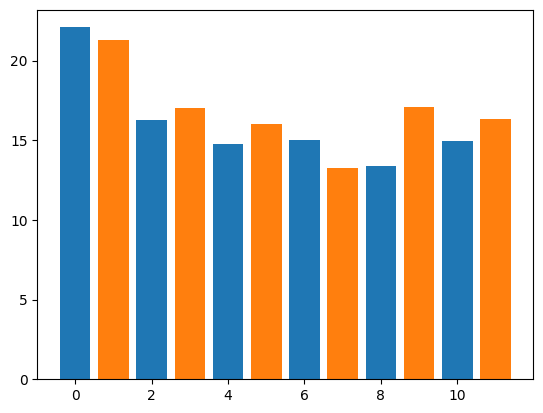

In [229]:
plt.bar(x1, y1)
plt.bar(x2, y2)
plt.show()

# pivot_table
1. 그룹화
2. 행 인덱스
3. 형 인덱스
4. 데이터 값
5. 데이터의 집계

In [230]:
titanic = sns.load_dataset("titanic")[["age", "sex", "class", "fare", "survived"]]
titanic.head(1)

,age,sex,class,fare,survived
0,22.0,male,Third,7.25,0


In [231]:
pd.pivot_table(
    titanic,         # 기준이 되는 데이터프레임
    index = "class", # 등급별로 그룹화
    columns = "sex", # 성별로 분할
    values = "age",  # 그룹화된 데이터들의 나이를 선택
    aggfunc = "mean" # 나이의 평균
)

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [236]:
# 클래스별 성별 생존자의 수를 출력

# groupby
titanic_group_data = titanic.groupby(["class", "sex"]).sum()[["survived"]]

In [237]:
titanic_group_data

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [233]:
# 클래스별 성별 생존자의 수를 출력

# pivot_table
pd.pivot_table(
    titanic,         # 기준이 되는 데이터프레임
    index = "class", # 등급별로 그룹화
    columns = "sex", # 성별로 분할
    values = "survived",  # 그룹화된 데이터들의 생존 여부를 선택
    aggfunc = "sum" # 생존자의 합계
)

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


In [238]:
# 클래스별 성별 생존자의 수를 출력

# pivot_table
pd.pivot_table(
    titanic,         
    index = ["class", "sex"], 
    values = "survived",  
    aggfunc = "sum" 
)

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [240]:
# 자리 등급과 성별에 따라
# 생존자와 사망자의 
# 나이의 평균

pd.pivot_table(
    titanic,        
    index = ["class", "sex"],
    columns = "survived", 
    values = "age", 
    aggfunc = "mean" 
)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211